# **Introduction**

Trong phần trước, chúng ta đã đi qua một số khái niệm xử lý ngôn ngữ tự nhiên cơ bản. Những thứ chính là mã hóa (chuyển từ thành số) và tạo nhúng (tạo biểu diễn số của từ).

Trong dự án này, chúng ta sẽ đưa những gì chúng ta đã học được vào thực tế.


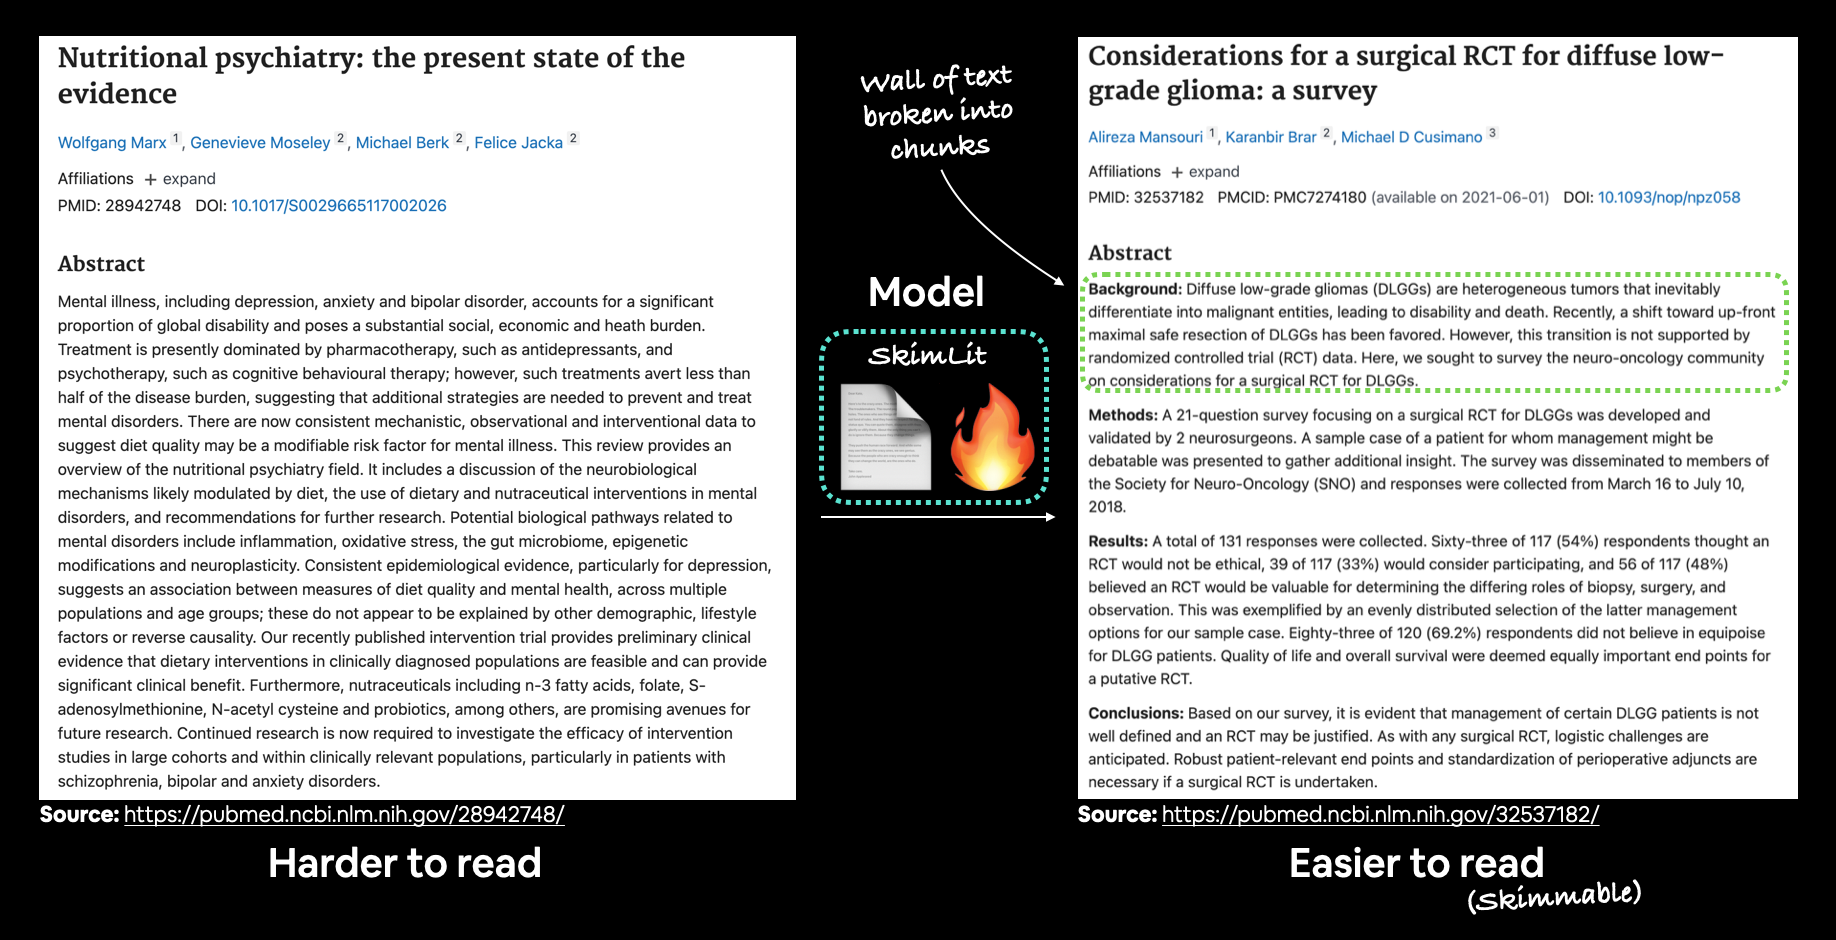

**Model Input**

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

**Model output**

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```


**Vấn đề tồn tại**

Số lượng các bài báo RCT được phát hành đang tiếp tục tăng lên, những bài báo không có cấu trúc tóm tắt có thể khó đọc và do đó làm chậm lại các nhà nghiên cứu trong việc tìm hiểu tài liệu.

**Giải pháp**

Để giải quyết vấn đề nêu trên, chúng ta sẽ tạo mô hình NLP để phân loại các câu trừu tượng theo vai trò của chúng (ví dụ: mục tiêu, phương pháp, kết quả, v.v.) để cho phép các nhà nghiên cứu đọc lướt qua tài liệu và đi sâu hơn khi cần thiết.

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-82c96b13-1db0-3fac-a9f9-6775f5898477)


# **Lấy dữ liệu**

Trước khi có thể bắt đầu xây dựng một mô hình, chúng ta phải tải xuống bộ dữ liệu PubMed 200k RCT.Các tác giả của bài báo đã công bố công khai và miễn phí dữ liệu họ sử dụng cho nghiên cứu của mình dưới dạng tệp .txt trên GitHub.Chúng ta có thể sao chép chúng vào thư mục cục bộ của mình bằng git clone https://github.com/Franck-Dernoncourt/pubmed-rct.

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


Kiểm tra nội dung của kho tải xuống,có thể thấy có bốn thư mục.Mỗi thư mục chứa một phiên bản khác nhau của tập dữ liệu PubMed 200k RCT.Theo mục [README file](https://github.com/Franck-Dernoncourt/pubmed-rct) từ trang GitHub, chúng ta nhận được thông tin sau:
- PubMed_20k_RCT : là một tập hợp con của PubMed 200k.
- PubMed_200k_RCT giống như PubMed_200k_RCT_numbers_replaced_with_at_sign, ngoại trừ ở phần sau, tất cả các số đã được thay thế bằng @. (tương tự cho PubMed_20k_RCT so với PubMed_20k_RCT_numbers_replaced_with_at_sign).


Chúng ta sẽ sử dụng tập dữ liệu PubMed_20k_RCT_numbers_replaced_with_at_sign để xây dựng mô hình. Thay vì làm việc với toàn bộ tập dữ liệu 200k để có thể đào tạo nhanh hơn và tốn ít bộ nhớ hơn.

In [ ]:
# Check what files are in the PubMed_20K dataset 
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

# **Tiền xử lý dữ liệu**

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Đọc các dòng từ tệp văn bản huấn luyện dẫn đến một danh sách các chuỗi chứa các mẫu tóm tắt khác nhau, các câu trong một mẫu cùng với vai trò của câu trong tóm tắt.Vai trò của mỗi câu được đặt ở đầu mỗi dòng được phân tách bằng dấu tab (\ t) và mỗi câu kết thúc bằng một dòng mới (\ n).
Các phần tóm tắt khác nhau được phân tách bằng ID trừu tượng (các dòng bắt đầu bằng ###) và các dòng mới (\ n).

Biết được điều này, có vẻ như chúng ta sẽ phải thực hiện một số bước để các mẫu sẵn sàng chuyển làm dữ liệu đào tạo cho mô hình học máy trong tương lai của chúng ta.Chúng ta sẽ đi viết các hàm để tiền xử lý các vấn đề sau:
- Lấy một tệp mục tiêu của các mẫu tóm tắt.
- Đọc các dòng trong tệp đích.
- Đối với mỗi dòng trong tệp đích:
>- Nếu dòng bắt đầu bằng ###, hãy đánh dấu nó là ID trừu tượng và là phần bắt đầu của một đoạn tóm tắt mới
>- Nếu dòng bắt đầu bằng \ n, hãy đánh dấu nó là phần cuối của một mẫu tóm tắt
>- Ghi lại văn bản trước \ t làm nhãn của dòng.
>- Ghi lại văn bản sau \ t dưới dạng văn bản của dòng.
- Trả lại tất cả các dòng trong tệp văn bản đích dưới dạng danh sách các từ điển có chứa các cặp khóa / giá trị:
>- `line_number`: vị trí của dòng trong phần tóm tắt.
>- `target`: vai trò của dòng trong phần tóm tắt (ví dụ: OBJECTIVE - Mục tiêu)
>- `text`: văn bản của dòng trong phần tóm tắt.
>- `total_lines`: tổng số dòng trong một mẫu tóm tắt.

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples

In [ ]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 426 ms, sys: 92.9 ms, total: 519 ms
Wall time: 521 ms


In [ ]:
# Check the first abstract of our training data
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
# Distribution of labels in training data
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

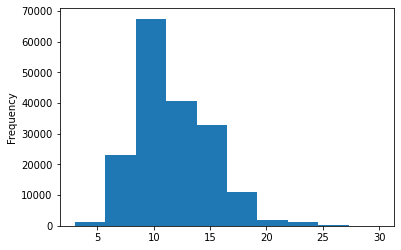

In [ ]:
train_df.total_lines.plot.hist();

## Nhận danh sách các câu

Khi chúng ta xây dựng mô hình học sâu của mình, một trong những đầu vào chính của nó sẽ là danh sách các chuỗi (các dòng của một bản tóm tắt).húng ta có thể dễ dàng lấy những thứ này từ DataFrames của mình bằng cách gọi phương thức `tolist()` trên các cột "văn bản" của chúng ta

In [ ]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# View first 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Tạo nhãn số

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## **Chuẩn bị dữ liệu huấn luyện**

Trước khi bắt đầu xây dựng các mô hình sâu hơn, chúng ta phải tạo vectơ hóa và nhúng các lớp.

Lớp vectơ hóa sẽ chuyển đổi văn bản của chúng ta thành các con số và lớp nhúng sẽ nắm bắt các mối quan hệ giữa các con số đó.

Để bắt đầu tạo vectơ hóa và nhúng các lớp của chúng ta, chúng ta sẽ cần nhập các thư viện thích hợp (cụ thể là TensorFlow và NumPy).

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Vì chúng ta sẽ chuyển các câu của mình thành số,nên cần tìm ra có bao nhiêu từ trong mỗi câu.

Khi mô hình của chúng ta đi qua các câu, nó hoạt động tốt nhất khi chúng có cùng chiều dài (điều này rất quan trọng để tạo ra các lô có cùng kích thước tensor).

Ví dụ, nếu một câu dài 8 từ và một câu khác dài 29 từ, chúng ta muốn chèn câu 8 từ bằng các số 0 để nó có cùng độ dài với câu 29 từ.

Hãy viết một số mã để tìm độ dài trung bình của các câu trong tập huấn luyện.

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

Xem xét phân phối của độ dài các câu

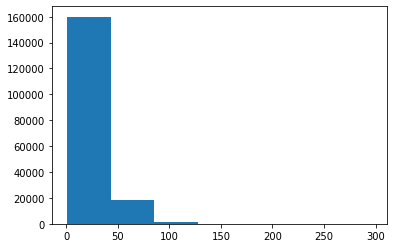

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

Có vẻ như phần lớn các câu có độ dài từ 0 đến 50 từ.Chúng ta có thể sử dụng `numpy.percentile` để tìm giá trị chiếm 95% độ dài câu.

In [ ]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

Khi chúng ta tạo lớp mã hóa, chúng ta sẽ sử dụng giá trị này để biến tất cả các câu thành cùng một độ dài.Có nghĩa các câu có độ dài dưới 55 sẽ được chèn thêm số 0 và các câu có độ dài trên 55 bị cắt bớt (các từ sau 55 bị cắt bỏ).

In [ ]:
max(sent_lens)

296

Chúng ta có thể sử dụng độ dài câu tối đa của các câu trong tập huấn luyện.Tuy nhiên, vì hầu như không có bất kỳ câu nào thậm chí gần với độ dài tối đa, điều đó có nghĩa là phần lớn dữ liệu chúng ta chuyển đến mô hình của mình sẽ là số không, điều này làm tốn dung lượng và giảm tốc độ huấn luyện mô hình.

## Tạo vectơ văn bản

Chúng ta đã có thêm một chút thông tin về văn bản của mình, hãy tạo một cách để biến nó thành số.Để làm như vậy, chúng ta sẽ sử dụng lớp `TextVectorization` từ TensorFlow.Phần 3.2 của bài báo PubMed 200k RCT nêu kích thước từ vựng của tập dữ liệu PubMed 20k là 68,000. Vì vậy, chúng ta sẽ sử dụng nó làm thông số `max_tokens`.`output_sequence_length parameter` sẽ là độ dài trung bình với 95% độ chính xác: 55.

In [ ]:
max_tokens = 68000

In [ ]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences

Có vẻ như `text_vectorizer` của chúng ta đã sẵn sàng, hãy điều chỉnh nó cho phù hợp với dữ liệu đào tạo (để nó đọc dữ liệu đào tạo và tìm ra số nào sẽ đại diện cho từ nào) và sau đó kiểm tra nó.

In [ ]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
a cross-section and @-month community-randomised trial was conducted .

Length of text: 9

Vectorized text:
[[    8 31919     3   178 61076    32    10   198     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


Sử dụng phương thức `get_vocabulary()` của `text_vectorizer`, chúng ta có thể tìm ra một vài mẩu tin khác nhau về văn bản.

In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


Và nếu chúng ta muốn tìm ra cấu hình của text_vectorizer, chúng ta có thể sử dụng phương thức `get_config()`

In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

## Tạo nhúng văn bản tùy chỉnh.

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
a cross-section and @-month community-randomised trial was conducted .

Sentence after vectorization (before embedding):
[[    8 31919     3   178 61076    32    10   198     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.01634414 -0.007199   -0.00338733 ... -0.00239598  0.04385905
    0.04049385]
  [-0.01531181  0.04261259 -0.04917243 ...  0.02341778 -0.02394704
    0.03550425]
  [-0.00919807  0.02943655 -0.016434   ...  0.00810643  0.0099576
   -0.03572389]
  ...
  [-0.0053026   0.01199647 -0.03855435 ...  0.01767925  0.03976918
    0.01193595]
  [-0.0053026   0.01199647 -0.03855435 ...  0.01767925  0.03976918
    0.01193595]
  [-0.0053026   0.01199647 -0.03855435 ...  0.01767925  0.0

## Tạo bộ dữ liệu.

Sau khi đã chuyển đổi dữ liệu sang dạng số và nhúng chúng, ta tiến hành đi tạo bộ dữ liệu cho quá trình huấn luyện, xác thực và thử nghiệm mô hình

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

# **Xây dựng các mô hình thử nghiệm**

Sau khi dữ liệu đã được tiền xử lý, chúng ta sẽ tiến hành đi xây dụng các mô hình học sâu thử nghiệm và đánh giá chúng.

Chúng ta sẽ bắt đầu bằng cách tạo một mô hình cơ sở đơn giản để đạt được điểm số mà chúng ta sẽ cố gắng đánh bại bằng cách xây dựng các mô hình ngày càng phức tạp hơn khi chúng ta tiến tới tái tạo mô hình trình tự được nêu trong bài báo [Neural networks for joint sentence classification in medical paper abstracts.](https://arxiv.org/pdf/1612.05251.pdf)

Đối với mỗi mô hình, chúng ta sẽ đào tạo nó trên dữ liệu đào tạo và đánh giá nó trên dữ liệu xác thực.

## Model 0: Mô hình cơ sở

Mô hình đầu tiên của chúng ta sẽ là TF-IDF Multinomial Naive Bayes theo đề xuất Scikit-Learn's machine learning map.

Để xây dựng nó, chúng ta sẽ tạo một `Scikit-Learn Pipeline` sử dụng lớp `TfidfVectorizer` để chuyển đổi các câu tóm tắt của chúng ta thành các số bằng cách sử dụng thuật toán TF-IDF (thuật ngữ tần số nghịch đảo tài liệu) và sau đó học cách phân loại các câu của chúng tôi bằng cách sử dụng thuật toán MultinomialNB .

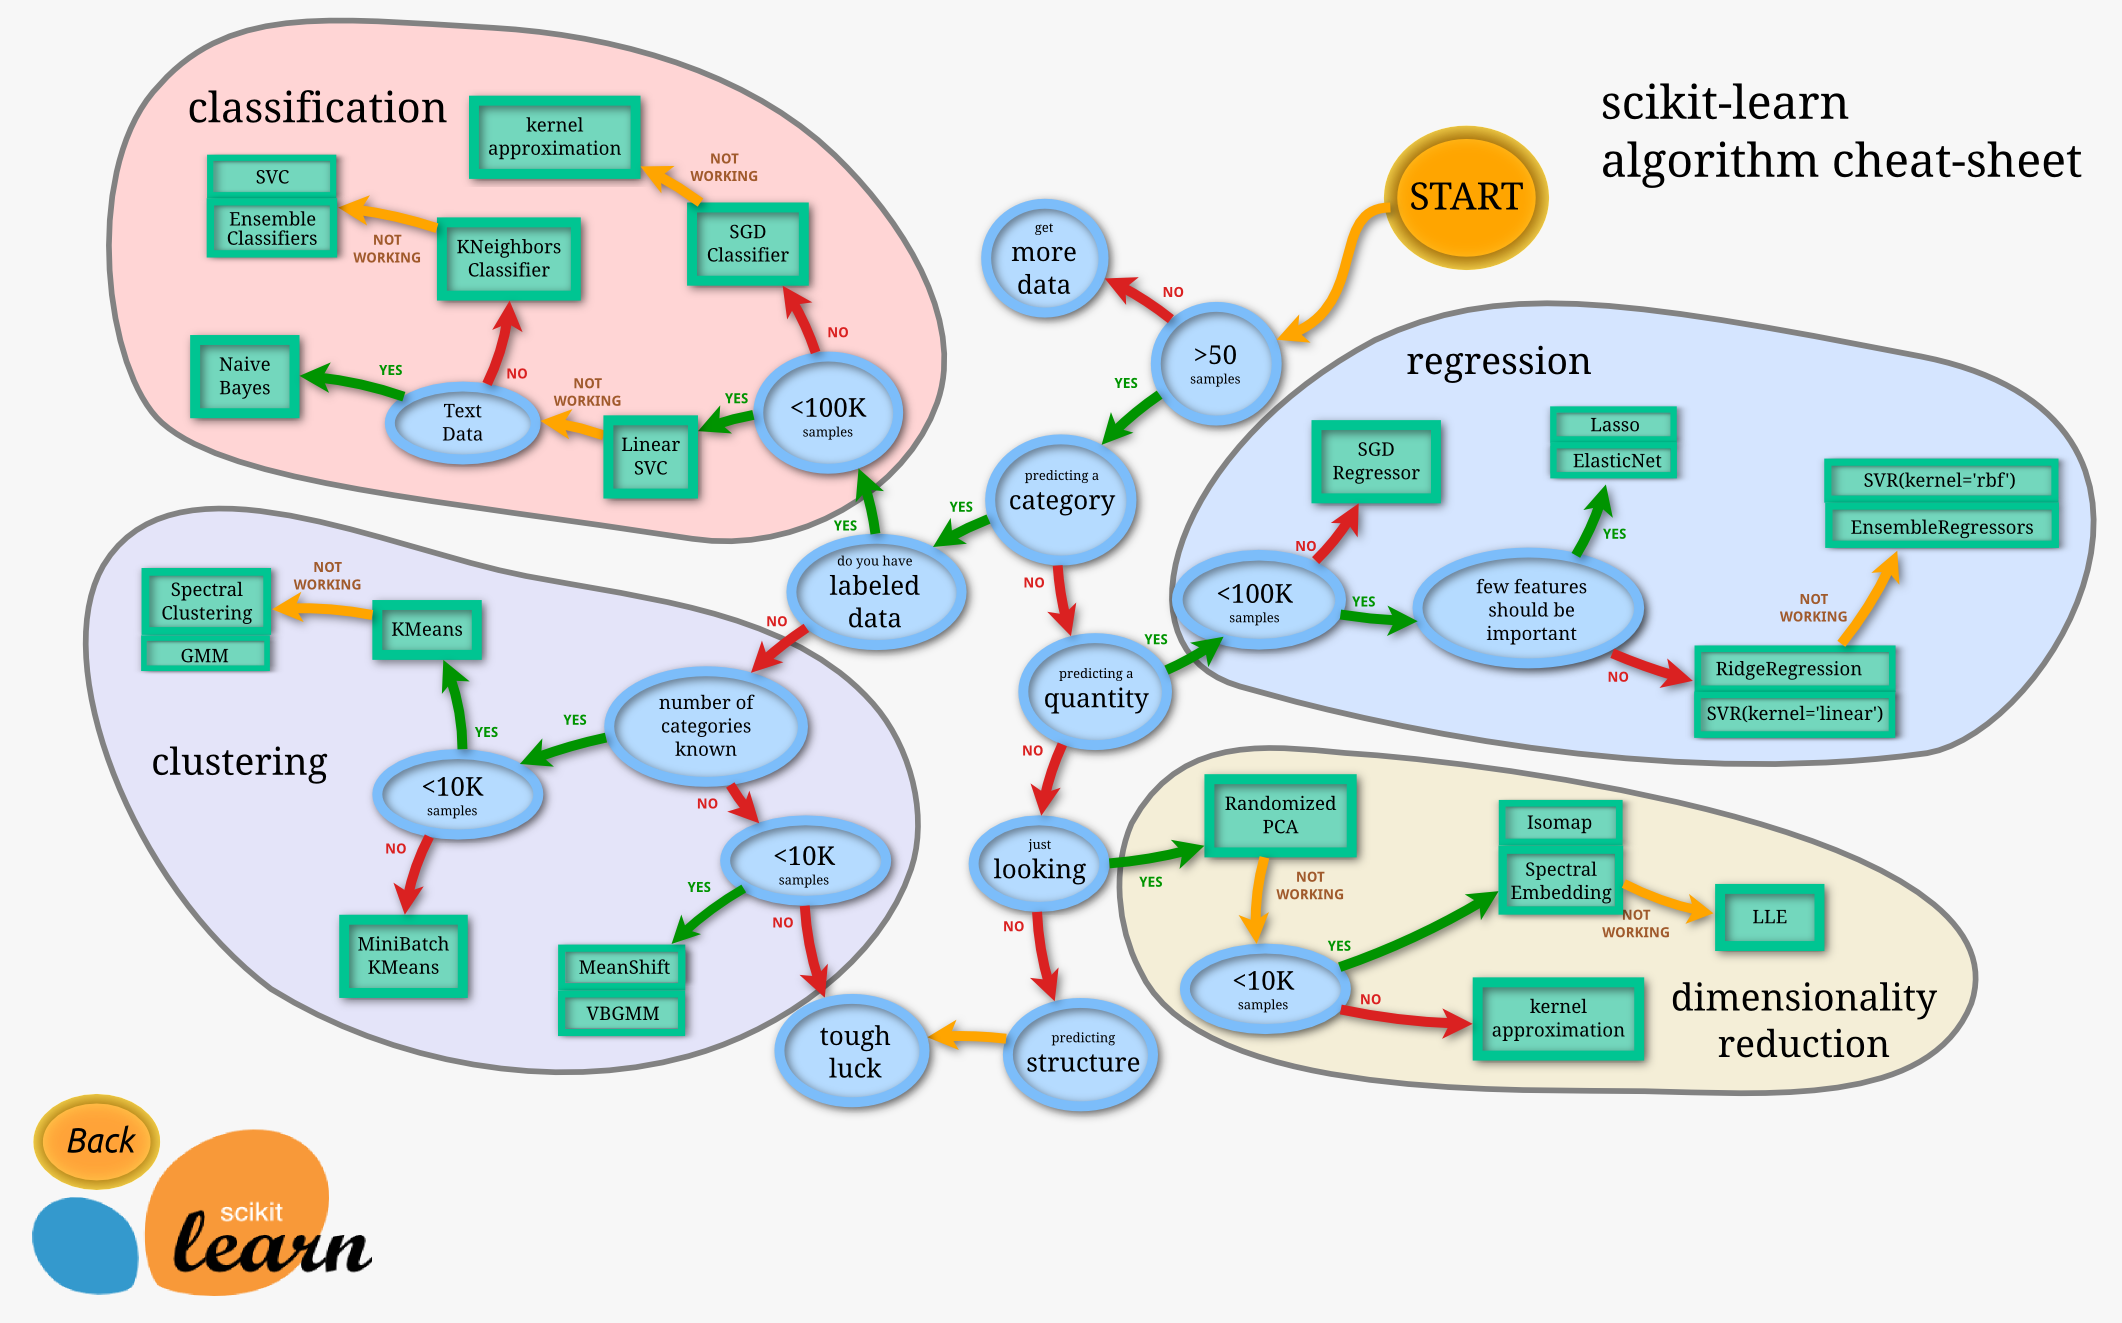

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, 
            y=train_labels_encoded);

In [ ]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-30 11:27:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-30 11:27:50 (80.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import calculate_results helper function
from helper_functions import calculate_results

In [ ]:

# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## **Model 1: Conv1D với nhúng mã token.**

Tất cả các mô hình sâu của chúng ta sẽ tuân theo một cấu trúc tương tự:
```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```
Thành phần chính mà chúng ta sẽ thay đổi trong suốt là thành phần Lớp. Bởi vì bất kỳ mô hình NLP sâu hiện đại nào đều yêu cầu văn bản phải được chuyển đổi thành một bản nhúng trước khi các mẫu có ý nghĩa có thể được phát hiện bên trong.

Mô hình đầu tiên chúng ta sẽ xây dựng là Mạng nơ-ron 1 chiều(Conv1D).

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:

# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=len(train_dataset),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=len(valid_dataset)) 

Epoch 1/3
5627/5627 [==============================] - 475s 79ms/step - loss: 0.6138 - accuracy: 0.7769 - val_loss: 0.5346 - val_accuracy: 0.8094
Epoch 2/3
5627/5627 [==============================] - 448s 80ms/step - loss: 0.4520 - accuracy: 0.8416 - val_loss: 0.5321 - val_accuracy: 0.8108
Epoch 3/3
5627/5627 [==============================] - 448s 80ms/step - loss: 0.3712 - accuracy: 0.8729 - val_loss: 0.5690 - val_accuracy: 0.8064


## **Model 2: Feature Extraction với nhúng token đã được đào tạo.**

Việc đào tạo mô hình riêng do chúng ta tự khởi tạo sẽ gây tốn thời gian. Vì chúng ta đang tiến tới tái tạo kiến ​​trúc mô hình trong  [Neural Networks for Joint Sentence Classification in Medical Paper Abstracts](https://arxiv.org/pdf/1612.05251.pdf)và nó đề cập đến việc họ đã sử dụng nhúng GloVe được đào tạo trước như một cách để khởi tạo nhúng token của họ.Để mô phỏng điều này, hãy xem chúng ta có thể nhận được kết quả gì với nhúng Bộ mã hóa câu đa năng( Universal Sentence Encoder embeddings) được đào tạo trước từ TensorFlow Hub.

> Chú ý: Chúng ta có thể sử dụng các nhúng GloVe theo bài báo nhưng vì chúng ta đang làm việc với TensorFlow, chúng tôi sẽ sử dụng những gì có sẵn từ TensorFlow Hub (không nhúng GloVe). Chúng ta sẽ tiết kiệm bằng cách sử dụng nhúng GloVe được đào tạo trước làm tiện ích mở rộng.

Cấu trúc mô hình sẽ giống như sau:
```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```



In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
we did the stomach cancer adjuvant multi-institutional group trial ( samit ) to assess the superiority of sequential treatment ( paclitaxel then tegafur and uracil -lsb- uft -rsb- or paclitaxel then s-@ ) compared with monotherapy ( uft or s-@ ) and also the non-inferiority of uft compared with s-@ .

Sentence after embedding:
[ 0.03004329 -0.06449291 -0.03465287 -0.06507302 -0.03030068 -0.05924551
 -0.02795791 -0.07074237  0.02552589  0.00347697  0.08438774 -0.02007161
  0.0370491  -0.00143193  0.00716942 -0.06568956 -0.0756639  -0.06416186
  0.04955663 -0.03743381  0.08422834 -0.01599793 -0.05338756 -0.05010282
  0.03880587  0.06533315 -0.04723175  0.06066973  0.03480139  0.00485984] (truncated output)...

Length of sentence embedding:
512


In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=len(train_dataset),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=len(valid_dataset))

Epoch 1/3
5627/5627 [==============================] - 61s 11ms/step - loss: 0.5789 - accuracy: 0.7815 - val_loss: 0.5988 - val_accuracy: 0.7718
Epoch 2/3
5627/5627 [==============================] - 61s 11ms/step - loss: 0.5620 - accuracy: 0.7881 - val_loss: 0.5949 - val_accuracy: 0.7736
Epoch 3/3
5627/5627 [==============================] - 60s 11ms/step - loss: 0.5483 - accuracy: 0.7932 - val_loss: 0.5944 - val_accuracy: 0.7740


## **Model 3: Cov1D với nhúng ký tự.**

Bài báo [Neural Networks for Joint Sentence Classification in Medical Paper Abstracts](https://arxiv.org/pdf/1612.05251.pdf) đề cập đến mô hình của họ sử dụng kết hợp nhúng token và nhúng ký tự.

Chúng ta đã xây dựng các mô hình với nhúng token tùy chỉnh và nhúng token được đào tạo trước, vậy còn mô hình bằng cách nhúng ký tự thì sao?

Sự khác biệt giữa nhúng ký tự và token là nhúng ký tự được tạo bằng cách sử dụng các chuỗi được chia thành các ký tự (ví dụ hello -> [h, e, l, l, o] ).Trong khi, nhúng token được tạo trên các chuỗi được chia thành các token.

### Tạo tokenizer cấp ký tự

Chúng ta có thể tạo phép nhúng cấp độ ký tự bằng cách vector hóa các chuỗi của chúng ta trước tiên (sau khi chúng đã được chia thành các ký tự) bằng cách sử dụng lớp `TextVectorization` và sau đó chuyển các chuỗi được vector hóa đó qua một lớp Nhúng

Trước khi chúng ta có thể vectơ hóa các chuỗi của mình ở cấp độ ký tự, chúng ta cần phải chia chúng thành các ký tự. Hãy viết một hàm để làm như vậy

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'w e   d i d   t h e   s t o m a c h   c a n c e r   a d j u v a n t   m u l t i - i n s t i t u t i o n a l   g r o u p   t r i a l   (   s a m i t   )   t o   a s s e s s   t h e   s u p e r i o r i t y   o f   s e q u e n t i a l   t r e a t m e n t   (   p a c l i t a x e l   t h e n   t e g a f u r   a n d   u r a c i l   - l s b -   u f t   - r s b -   o r   p a c l i t a x e l   t h e n   s - @   )   c o m p a r e d   w i t h   m o n o t h e r a p y   (   u f t   o r   s - @   )   a n d   a l s o   t h e   n o n - i n f e r i o r i t y   o f   u f t   c o m p a r e d   w i t h   s - @   .'

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

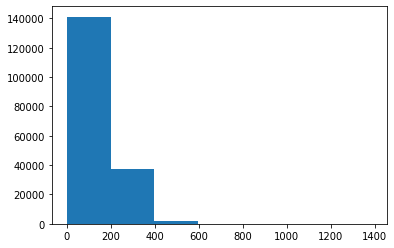

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

Có vẻ như hầu hết các chuỗi của chúng ta dài từ 0 đến 200 ký tự.

Hãy sử dụng phân vị của NumPy để tìm ra độ dài bao gồm 95% trình tự của chúng ta

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h i s   s t u d y   e x a m i n e s   e f f e c t s   o f   a   s c h o o l   g a r d e n   i n t e r v e n t i o n   o n   e l e m e n t a r y   s c h o o l   c h i l d r e n   ' s   p h y s i c a l   a c t i v i t y   (   p a   )   .

Length of chars: 100

Vectorized chars:
[[ 3 13  4  9  9  3 16 10 19  2 24  5 15  4  6  2  9  2 17 17  2 11  3  9
   7 17  5  9 11 13  7  7 12 18  5  8 10  2  6  4  6  3  2  8 21  2  6  3
   4  7  6  7  6  2 12  2 15  2  6  3  5  8 19  9 11 13  7  7 12 11 13  4
  12 10  8  2  6  9 14 13 19  9  4 11  5 12  5 11  3  4 21  4  3 19 14  5
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  

### Tạo nhúng cấp độ ký tự

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=True,
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h e   s t u d y   w a s   p e r f o r m e d   o n   @   p a t i e n t s   a t   a   t e r t i a r y   r e f e r r a l   h o s p i t a l   w i t h   n a s a l   p o l y p o s i s   r e s i s t a n t   t o   m a x i m a l   m e d i c a l   t r e a t m e n t   .

Embedded chars (after vectorization and embedding):
[[[-4.3739915e-02  6.7060068e-04  3.9927397e-02 ...  2.5561046e-02
   -3.8874783e-02  2.1040440e-05]
  [-3.3228472e-04 -2.7431361e-03 -4.6104241e-02 ... -1.1721812e-02
   -4.9077522e-02  3.5490841e-04]
  [-3.6633968e-02  1.2953471e-02  4.8190776e-02 ...  2.7296279e-02
   -4.2880833e-02  3.9669503e-02]
  ...
  [ 1.4265243e-02 -2.2934604e-02 -1.8517338e-02 ... -3.8492464e-02
    2.5514849e-03  4.3153550e-02]
  [ 1.4265243e-02 -2.2934604e-02 -1.8517338e-02 ... -3.8492464e-02
    2.5514849e-03  4.3153550e-02]
  [ 1.4265243e-02 -2.2934604e-02 -1.8517338e-02 ... -3.8492464e-02
    2.5514849e-03  4.3153550e-02]]]

Character embeddi

### Xây dựng mô hình Conv1D  nhúng ký tự và hợp mô hình.

In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=len(train_char_dataset),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=len(val_char_dataset))

Epoch 1/3
5627/5627 [==============================] - 35s 6ms/step - loss: 0.8571 - accuracy: 0.6696 - val_loss: 0.7808 - val_accuracy: 0.6955
Epoch 2/3
5627/5627 [==============================] - 34s 6ms/step - loss: 0.7312 - accuracy: 0.7228 - val_loss: 0.7425 - val_accuracy: 0.7154
Epoch 3/3
5627/5627 [==============================] - 34s 6ms/step - loss: 0.7018 - accuracy: 0.7348 - val_loss: 0.7211 - val_accuracy: 0.7219


## **Model 4: Kết hợp nhúng token với nhúng ký tự.**

Khi tiến gần hơn đến việc xây dựng một mô hình tương tự như trong Figure 1 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts,đã đến lúc chúng ta giải quyết lớp nhúng mã thông báo lai mà họ nói đến.Lớp nhúng token kết hợp này là sự kết hợp của nhúng token và nhúng ký tự. Nói cách khác, chúng tạo ra một nhúng xếp chồng lên nhau để đại diện cho các trình tự trước khi chuyển chúng đến lớp dự đoán nhãn trình tự.

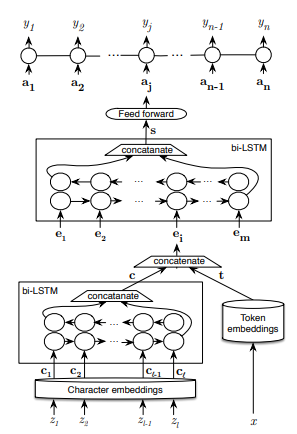

Trước đó, chúng ta đã xây dựng hai mô hình sử dụng mã thông báo và nhúng cấp độ ký tự, tuy nhiên, hai mô hình này đã sử dụng riêng từng cách nhúng này.Để bắt đầu sao chép (hoặc gần tái tạo) mô hình trong Figure 1 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts, chúng ta sẽ thực hiện các bước sau:
1. Tạo mô hình cấp token (tương tự như model_1)
2. Tạo mô hình cấp độ ký tự(tương tự như model_3 với một chút sửa đổi)
3. Kết hợp (sử dụng các `layers.Concatenate`) các kết quả đầu ra của 1 và 2
4. Xây dựng một loạt các lớp đầu ra trên 3 lớp tương tự như Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts.
5. Xây dựng một mô hình lấy token và chuỗi cấp ký tự làm đầu vào và tạo ra xác suất nhãn trình tự làm đầu ra

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

In [ ]:
# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

In [ ]:
# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

In [ ]:
# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

In [ ]:
# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

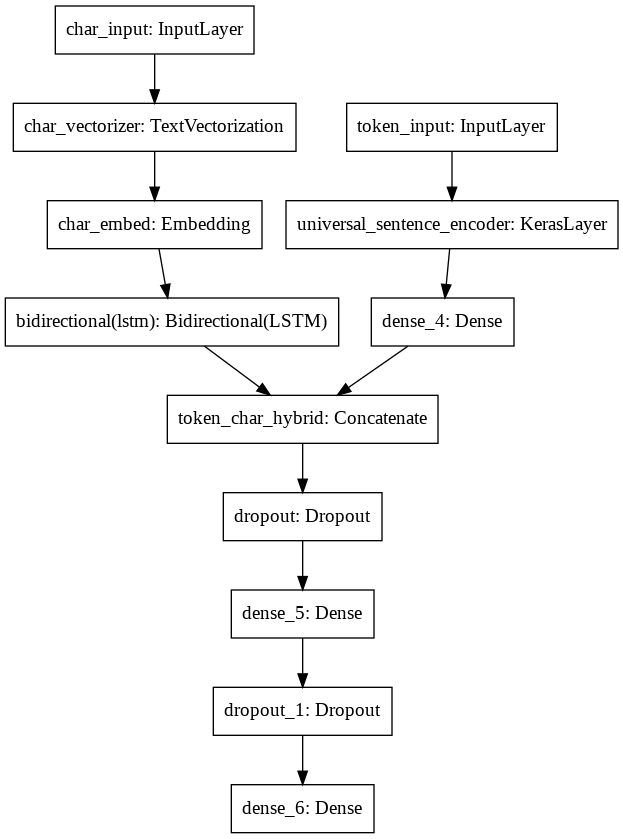

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Kết hợp dữ liệu token và dữ liệu ký tự thành một tập dữ liệu bằng tf.data

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Hợp mô hình

In [ ]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=len(train_char_token_dataset),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=len(val_char_token_dataset))

Epoch 1/3
5627/5627 [==============================] - 269s 46ms/step - loss: 0.7497 - accuracy: 0.7136 - val_loss: 0.6250 - val_accuracy: 0.7637
Epoch 2/3
5627/5627 [==============================] - 253s 45ms/step - loss: 0.6672 - accuracy: 0.7478 - val_loss: 0.5904 - val_accuracy: 0.7757
Epoch 3/3
5627/5627 [==============================] - 252s 45ms/step - loss: 0.6455 - accuracy: 0.7578 - val_loss: 0.5761 - val_accuracy: 0.7804


## **Model 5: Transfer Learning với nhúng token, nhúng ký tự và nhúng vị trí.**

In [ ]:
# Inspect training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

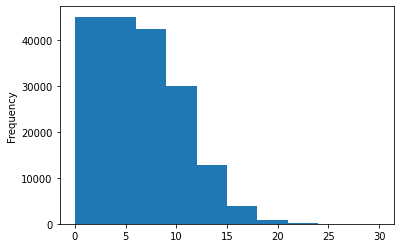

In [ ]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()


In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column 
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

In [ ]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

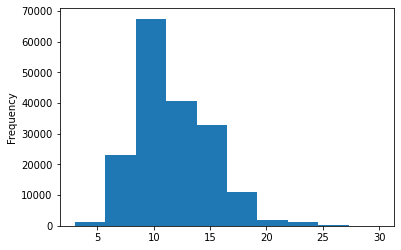

In [ ]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();

In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

20.0

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column 
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

### Building a tribrid embedding model

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_embeddings)

In [ ]:
# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

In [ ]:
# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

In [ ]:
# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

In [ ]:
# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

In [ ]:
# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

In [ ]:
# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

In [ ]:
# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer)

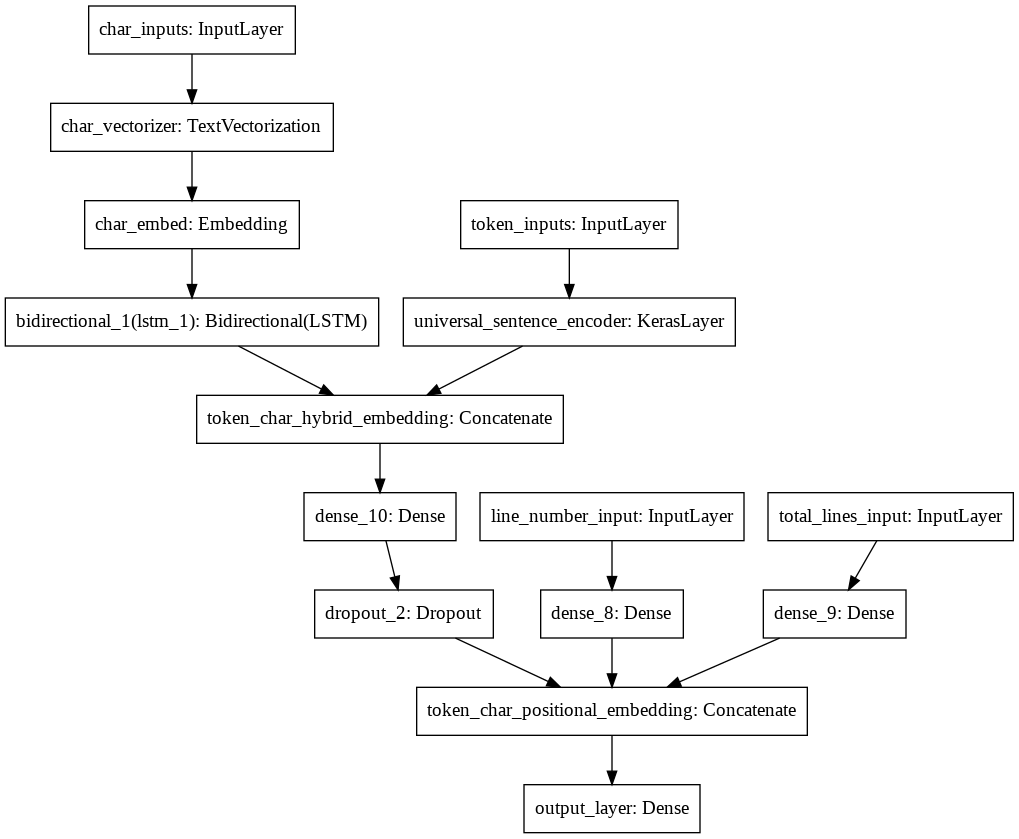

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f32b2877110> True
<tensorflow.python.keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f31cc69a790> True
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f32b28a2250> True
<tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f31cc69b710> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f33059a72d0> False
<tensorflow.python.keras.layers.wrappers.Bidirectional object at 0x7f32b28079d0> True
<tensorflow.python.keras.layers.merge.Concatenate object at 0x7f32b22abdd0> True
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f32b2480a50> True
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f32b2480dd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f32b22abcd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f32b2480ad0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f32b2480a10> Tru

In [ ]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Create tribrid embedding datasets and fit tribrid model

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=len(train_pos_char_token_dataset),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=len(val_pos_char_token_dataset))

Epoch 1/3
5627/5627 [==============================] - 272s 47ms/step - loss: 0.9612 - accuracy: 0.8214 - val_loss: 0.9149 - val_accuracy: 0.8494
Epoch 2/3
5627/5627 [==============================] - 263s 47ms/step - loss: 0.9225 - accuracy: 0.8499 - val_loss: 0.9050 - val_accuracy: 0.8571
Epoch 3/3
5627/5627 [==============================] - 254s 45ms/step - loss: 0.9127 - accuracy: 0.8569 - val_loss: 0.9009 - val_accuracy: 0.8598


# **Đánh giá so sánh mô hình.**

### So sánh hiệu suất mô hình

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)

In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)

In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)

In [ ]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)

945/945 [==============================] - 22s 21ms/step


In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,80.640143,0.803510,0.806401,0.804036
pretrained_token_embed,77.396399,0.772935,0.773964,0.770353
custom_char_embed_conv1d,72.186548,0.723904,0.721865,0.715057
hybrid_char_token_embed,75.930094,0.770983,0.759301,0.753965
tribrid_pos_char_token_embed,85.773865,0.859133,0.857739,0.854931


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

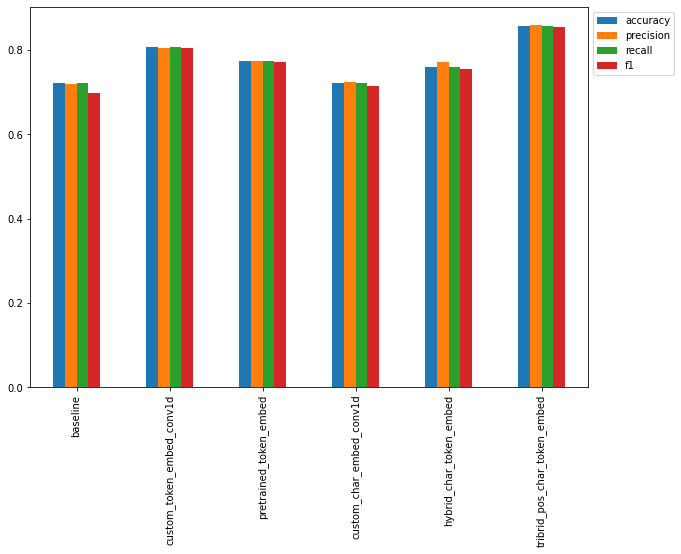

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

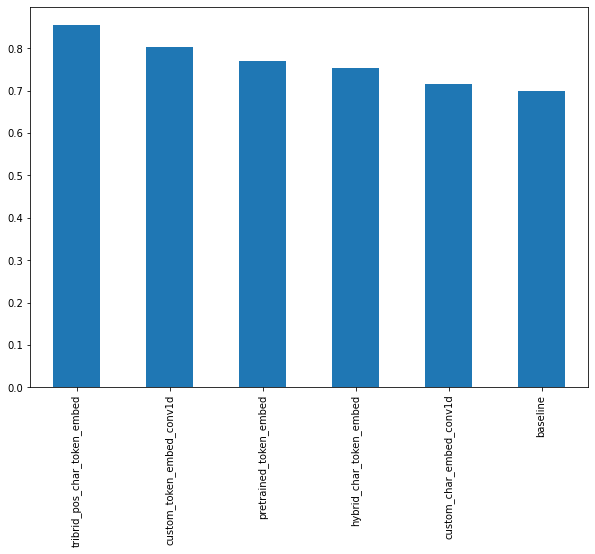

In [ ]:

# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

### Đánh giá mô hình trên tập dữ liệu thử nghiệm

In [ ]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [ ]:
# Make predictions on the test dataset
test_pred_probs = model_5.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 20s 21ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

In [ ]:
# Evaluate loaded model test predictions
test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
test_results

{'accuracy': 85.07715281234445,
 'f1': 0.8479651476267699,
 'precision': 0.8511622016705057,
 'recall': 0.8507715281234445}

# Tìm mẫu sai nhiều nhất.

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 9.42 s, sys: 845 ms, total: 10.3 s
Wall time: 8.56 s


In [ ]:
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.436322,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,METHODS,0.432720,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.842838,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.588455,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.781602,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.879268,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.657479,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.627894,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.575602,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.617068,True


In [ ]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.960417,False
1827,CONCLUSIONS,nct@ ( clinicaltrials.gov ) .,18,18,BACKGROUND,0.959637,False
22736,OBJECTIVE,"the national institute of oncology , budapest ...",4,20,METHODS,0.959372,False
8545,METHODS,pretest-posttest .,1,11,BACKGROUND,0.953179,False
16780,METHODS,we will comply with the consort guidelines and...,16,19,BACKGROUND,0.949828,False
...,...,...,...,...,...,...,...
3665,CONCLUSIONS,there were no significant differences between ...,9,10,RESULTS,0.844384,False
27134,OBJECTIVE,headache relief after anterior cervical discec...,4,15,METHODS,0.842979,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.842838,False
8358,CONCLUSIONS,nct@ .,11,11,BACKGROUND,0.842610,False


In [ ]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9604174494743347, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9596371650695801, Line number: 18, Total lines: 18

Text:
nct@ ( clinicaltrials.gov ) .

-----

Target: OBJECTIVE, Pred: METHODS, Prob: 0.95937180519104, Line number: 4, Total lines: 20

Text:
the national institute of oncology , budapest conducted a single centre randomized clinical study .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9531792998313904, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9498275518417358, Line number: 16, Total lines: 19

Text:
we will comply with the consort guidelines and will disseminate the findings at national and international conferences and in peer-reviewed journals .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.9356972575187683, Line number: 6, Total 

# Đưa ra dữ báo.



In [ ]:
import json

In [ ]:
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/Wassefy/tensorflow/main/Extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2021-06-30 13:00:59--  https://raw.githubusercontent.com/Wassefy/tensorflow/main/Extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json.2’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2021-06-30 13:00:59 (85.9 MB/s) - ‘skimlit_example_abstracts.json.2’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'details': 'RCT of a manualized social treatment for high-functioning autism spectrum 

In [ ]:
# See what our example abstracts look like
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd 
from spacy.lang.en import English
nlp = English() # setup English sentence parser
sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser
doc = nlp(example_abstracts[0]["abstract"]) # create "doc" of parsed sequences, change index for a different abstract
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'line_number': 0,
  'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'total_lines': 7},
 {'line_number': 1,
  'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'total_lines': 7},
 {'line_number': 2,
  'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'total_lines': 7},
 {'line_number': 3,
  'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'total_lines': 7},
 {'line_number': 4,
  'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'total_lines': 7},
 {'line_number': 5,
  'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'total_lines': 7},
 {'line_

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = model_5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

CPU times: user 2.22 s, sys: 72.8 ms, total: 2.29 s
Wall time: 2.26 s


In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [ ]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
